### Analysis

Based on geomapping the cities that were randomly selected, it looks like a reasonable cross-section of different latitudes were sampled. No region or continent in particular looks oversampled, though areas with fewer people and fewer cities (the Sahara Desert, the Australian outback, western China, etc.) may have been undersampled. This is due to the nature of our data collection; the latitudes and longitudes we gathered were random, but they were filtered through the nearest city and available weather data on OpenWeatherMap. We also have more far northern latitudes available to us (greater than 60 degrees) than far southern (less than -60 degrees) latitudes because there are no cities below the -60th parallel. (There are research stations in Antarctica, but they aren't available to us through citipy).

Based on our data, there does appear to be a clear relationship between latitude and current temperature. The warmest temperatures are found from -20 degrees latitude to about 20 degrees latitude. This includes the equator and the tropics, where we would expect to find the warmest temperatures on our globe. On either side of the tropics, temperatures appear to decrease at an exponential rate, with the lowest temperatures in our data set found at the northernmost latitudes. On the whole, the southern hemisphere (latitudes below 0) is warmer than the northern hemisphere right now, but I would expect that pattern to reverse itself with the changing seasons.   

Based on the scatterplot, it's clear that there is no relationship between humidity and latitude. There also appears to be no relationship between cloudiness and latitude and wind speed and latitude. Varying levels of humidity, wind speed, and cloudiness can be found at all levels of the globe. 



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
import gmaps

# Import API key
from api_keys import api_key
from api_keys import gkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [3]:
#Create dataframe

weather_df = pd.DataFrame({"Cities" : cities})
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Temperature"] = "" 
weather_df["Humidity (%)"] = ""
weather_df["Cloudiness"] = ""
weather_df["Wind Speed"] = ""

weather_df.head()

,Cities,Latitude,Longitude,Temperature,Humidity (%),Cloudiness,Wind Speed
0,butaritari,,,,,,
1,gao,,,,,,
2,moose factory,,,,,,
3,nara,,,,,,
4,taolanaro,,,,,,


In [4]:
#loop through the cities in weather_df and get all information

for index, row in weather_df.iterrows():
    city = row["Cities"]
    weather_url = weather_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&APPID={api_key}&units=imperial"
    print(f"Processing Record {index} for {city}.")
    try:
        response = requests.get(weather_url).json()
        weather_df.loc[index, 'Latitude'] = response['coord']['lat']
        weather_df.loc[index, 'Longitude'] = response['coord']['lon']
        weather_df.loc[index, 'Temperature'] =response['main']['temp']
        weather_df.loc[index, 'Humidity (%)'] = response['main']['humidity']
        weather_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        weather_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        time.sleep(1)
    except KeyError:
        print(f"{city} not found.")
        


Processing Record 0 for butaritari.
Processing Record 1 for gao.
Processing Record 2 for moose factory.
Processing Record 3 for nara.
Processing Record 4 for taolanaro.
taolanaro not found.
Processing Record 5 for leningradskiy.
Processing Record 6 for saint-philippe.
Processing Record 7 for punta arenas.
Processing Record 8 for aswan.
Processing Record 9 for carutapera.
Processing Record 10 for rikitea.
Processing Record 11 for arraial do cabo.
Processing Record 12 for dingle.
Processing Record 13 for hobart.
Processing Record 14 for ponta do sol.
Processing Record 15 for marawi.
Processing Record 16 for khandyga.
Processing Record 17 for albany.
Processing Record 18 for ahtopol.
Processing Record 19 for ushuaia.
Processing Record 20 for avarua.
Processing Record 21 for georgetown.
Processing Record 22 for kruisfontein.
Processing Record 23 for illoqqortoormiut.
illoqqortoormiut not found.
Processing Record 24 for tuktoyaktuk.
Processing Record 25 for ust-omchug.
Processing Record 26 

Processing Record 213 for kuloy.
Processing Record 214 for wiwili.
Processing Record 215 for lakatoro.
Processing Record 216 for bethel.
Processing Record 217 for hirara.
Processing Record 218 for kuche.
kuche not found.
Processing Record 219 for kendari.
Processing Record 220 for kamenka.
Processing Record 221 for irbil.
irbil not found.
Processing Record 222 for barcelos.
Processing Record 223 for chardara.
chardara not found.
Processing Record 224 for caravelas.
Processing Record 225 for cap malheureux.
Processing Record 226 for puerto colombia.
Processing Record 227 for tona.
Processing Record 228 for amderma.
amderma not found.
Processing Record 229 for sheffield.
Processing Record 230 for nizhneyansk.
nizhneyansk not found.
Processing Record 231 for marataizes.
Processing Record 232 for korla.
korla not found.
Processing Record 233 for souillac.
Processing Record 234 for vero beach.
Processing Record 235 for mandalgovi.
Processing Record 236 for santa rosa.
Processing Record 237 

Processing Record 425 for hobyo.
Processing Record 426 for palmerston.
Processing Record 427 for roma.
Processing Record 428 for cherskiy.
Processing Record 429 for flinders.
Processing Record 430 for makung.
makung not found.
Processing Record 431 for huazolotitlan.
huazolotitlan not found.
Processing Record 432 for sangar.
Processing Record 433 for antofagasta.
Processing Record 434 for wanning.
Processing Record 435 for srednekolymsk.
Processing Record 436 for te anau.
Processing Record 437 for saleaula.
saleaula not found.
Processing Record 438 for semirom.
Processing Record 439 for hay river.
Processing Record 440 for gonzaga.
Processing Record 441 for antalaha.
Processing Record 442 for olden.
Processing Record 443 for buchanan.
Processing Record 444 for kalmunai.
Processing Record 445 for ambulu.
Processing Record 446 for hasaki.
Processing Record 447 for harper.
Processing Record 448 for port augusta.
Processing Record 449 for sakakah.
sakakah not found.
Processing Record 450 f

In [5]:
#Drop cities that weren't found

weather_df.replace('', np.nan, inplace=True)
weather_df = weather_df.dropna(how='any')

weather_df = weather_df.reset_index(drop = True)
weather_df

,Cities,Latitude,Longitude,Temperature,Humidity (%),Cloudiness,Wind Speed
0,butaritari,3.07,172.79,80.20,100.0,76.0,11.83
1,gao,16.28,-0.04,75.65,34.0,12.0,8.25
2,moose factory,51.26,-80.61,12.20,39.0,1.0,11.41
3,nara,34.68,135.80,42.39,80.0,20.0,1.12
4,leningradskiy,69.38,178.42,-2.47,83.0,80.0,28.16
5,saint-philippe,45.36,-73.48,25.63,38.0,75.0,11.41
6,punta arenas,-53.16,-70.91,48.11,76.0,90.0,33.33
7,aswan,24.09,32.90,59.00,28.0,0.0,6.93
8,carutapera,-1.20,-46.02,76.51,98.0,36.0,3.89
9,rikitea,-23.12,-134.97,78.76,100.0,68.0,21.34


In [6]:
#Save dataframe to csv
weather_df.to_csv("weather.csv", index=False, header=True)

In [8]:
#Map the cities using google API
gmaps.configure(api_key = gkey)
locations = weather_df[["Latitude", "Longitude"]]
fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations))
fig

Figure(layout=FigureLayout(height='420px'))

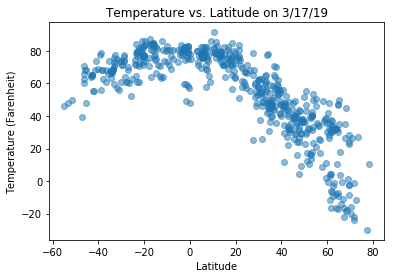

<Figure size 432x288 with 0 Axes>

In [9]:
#Plot Temperature vs. Latitude

plt.scatter(weather_df["Latitude"], weather_df["Temperature"], alpha = 0.5)
plt.title("Temperature vs. Latitude on 3/17/19")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Farenheit)")

plt.show()
plt.savefig("templat.png")

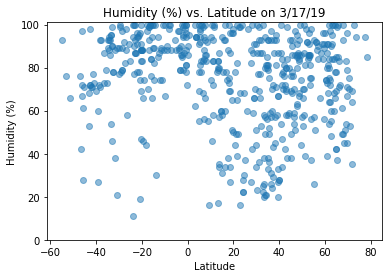

In [10]:
#Plot Latitude vs. Humidity
plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], alpha = 0.5)
plt.title("Humidity (%) vs. Latitude on 3/17/19")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 101)

plt.savefig("humiditylat.png")

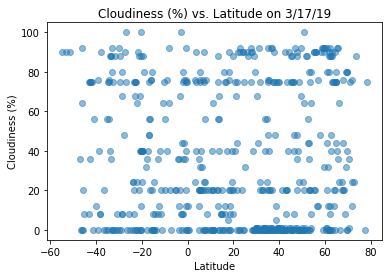

In [11]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], alpha = 0.5)
plt.title("Cloudiness (%) vs. Latitude on 3/17/19")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("cloudinesslat.png")

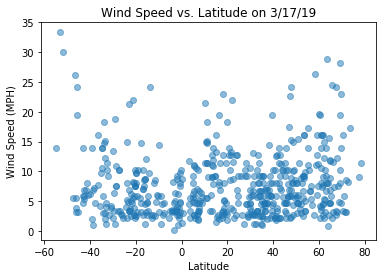

In [12]:
#Windspeed vs. Latitude

plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], alpha = 0.5)
plt.title("Wind Speed vs. Latitude on 3/17/19")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

plt.savefig("speedlat.png")